In this notebook we will build a classification model using DecisionTrees and Random forest classifier from python's scikit learn library

## Table of contents
1. Data Loading
2. Data Exploration
3. Visualization
4. Preprocessing
5. Decision Trees and hyperparameter analysis 
5. Random Forest
6. Model comparision using ROC curve

## Loading Data

In this section we will import all the necessary packages and load the datasets we plan to work on. We will use the 
<a href='https://www.kaggle.com/jessemostipak/hotel-booking-demand'> Hotel booking data </a> and build a model to determine which customers will cancel their hotel booking

In [113]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix,auc,roc_auc_score,roc_curve

In [3]:
# Load the data
file_path = 'C:\Users\Tejal\Documents\Tejal\WWC-siliconvalley\hotel_bookings.csv'
df = pd.read_csv(file_path)

## Explore the dataset

Understanding the data, its features and distribution is a major part of builiding ML models. 

In [251]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,distribution_channel,is_repeated_guest,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_customers
0,1,0,342,0,27,1,0,0,0,1,0,2,3,0,0,2,0.0,0,0,2.0
1,1,0,737,0,27,1,0,0,0,1,0,2,4,0,0,2,0.0,0,0,2.0
2,1,0,7,0,27,1,0,1,0,1,0,2,0,0,0,2,75.0,0,0,1.0
3,1,0,13,0,27,1,0,1,0,0,0,0,0,0,0,2,75.0,0,0,1.0
4,1,0,14,0,27,1,0,2,0,3,0,0,0,0,0,2,98.0,0,1,2.0


In [4]:
# Data has 119390 rows (data points) and 32 columns (features)
df.shape   

(119390, 32)

In [6]:
# Check the datatype of features
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [7]:
# Feature list 
df.columns

Index([u'hotel', u'is_canceled', u'lead_time', u'arrival_date_year',
       u'arrival_date_month', u'arrival_date_week_number',
       u'arrival_date_day_of_month', u'stays_in_weekend_nights',
       u'stays_in_week_nights', u'adults', u'children', u'babies', u'meal',
       u'country', u'market_segment', u'distribution_channel',
       u'is_repeated_guest', u'previous_cancellations',
       u'previous_bookings_not_canceled', u'reserved_room_type',
       u'assigned_room_type', u'booking_changes', u'deposit_type', u'agent',
       u'company', u'days_in_waiting_list', u'customer_type', u'adr',
       u'required_car_parking_spaces', u'total_of_special_requests',
       u'reservation_status', u'reservation_status_date'],
      dtype='object')

In [10]:
# Check for null values
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False,inplace=True)
missing_value_df

,column_name,percent_missing
company,company,94.306893
agent,agent,13.686238
country,country,0.408744
children,children,0.003350
reserved_room_type,reserved_room_type,0.000000
assigned_room_type,assigned_room_type,0.000000
booking_changes,booking_changes,0.000000
deposit_type,deposit_type,0.000000
hotel,hotel,0.000000
previous_cancellations,previous_cancellations,0.000000


Company, agent, country and children have null values. There are multiple techniques for imputing null value but for simplicity we impute them with 0. As company has a very high null value percentage we will drop the column

In [4]:
# Let us create a copy of dataframe for backup and impute null with 0
backup_df=df.copy
df = df.drop('company',axis=1)
df=df.fillna(0)

In [5]:
# The df has no Null values
(df['agent'].isnull().sum()/len(df)) * 100

0

## Data Visualization

In this task, our target variable is is_cancelled which indicates if the booking was cancelled. 1 --> canceled, 0 --> Not canceled 

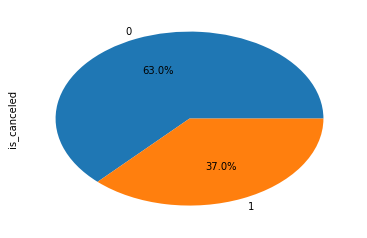

In [15]:
df['is_canceled'].value_counts().plot(kind='pie',autopct='%1.1f%%')

37% customers have cancelled their bookings. we see that our data in imbalanced

In [35]:
df.columns

Index([u'hotel', u'is_canceled', u'lead_time', u'arrival_date_year',
       u'arrival_date_month', u'arrival_date_week_number',
       u'arrival_date_day_of_month', u'stays_in_weekend_nights',
       u'stays_in_week_nights', u'adults', u'children', u'babies', u'meal',
       u'country', u'market_segment', u'distribution_channel',
       u'is_repeated_guest', u'previous_cancellations',
       u'previous_bookings_not_canceled', u'reserved_room_type',
       u'assigned_room_type', u'booking_changes', u'deposit_type', u'agent',
       u'days_in_waiting_list', u'customer_type', u'adr',
       u'required_car_parking_spaces', u'total_of_special_requests',
       u'reservation_status', u'reservation_status_date'],
      dtype='object')

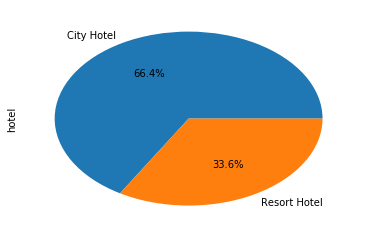

In [37]:
# Hotel feature count and distribution across 0 and 1 class 
df['hotel'].value_counts().plot(kind='pie',autopct='%1.1f%%')

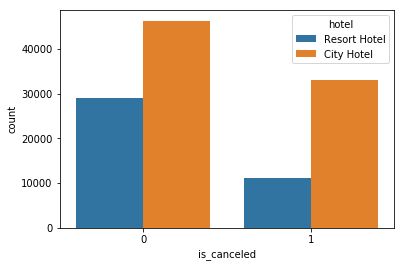

In [36]:
sns.countplot(x='is_canceled',hue='hotel',data=df)

As data has higher city hotel reservation data points compared to resort, above observation is on par with  same trend

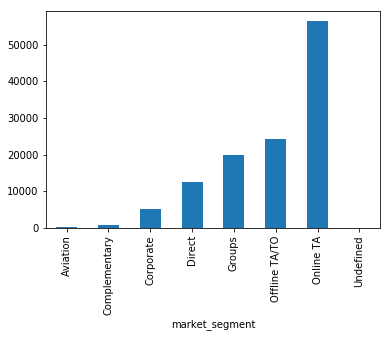

In [38]:
#market segments
df.groupby(['market_segment'])['is_canceled'].count().plot(kind='bar')

## Feature Engineering

1. Derive new features using existing features
2. Remove irrelevant features
3. Transform existing features
4. Encoding categorical variables

In [6]:
#Let us add weekend stay and weekday stay days to get total days of stay
df['total_days'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
# drop the weekend stay and weekday stay days features
df = df.drop('stays_in_week_nights',axis=1).drop('stays_in_weekend_nights',axis=1)

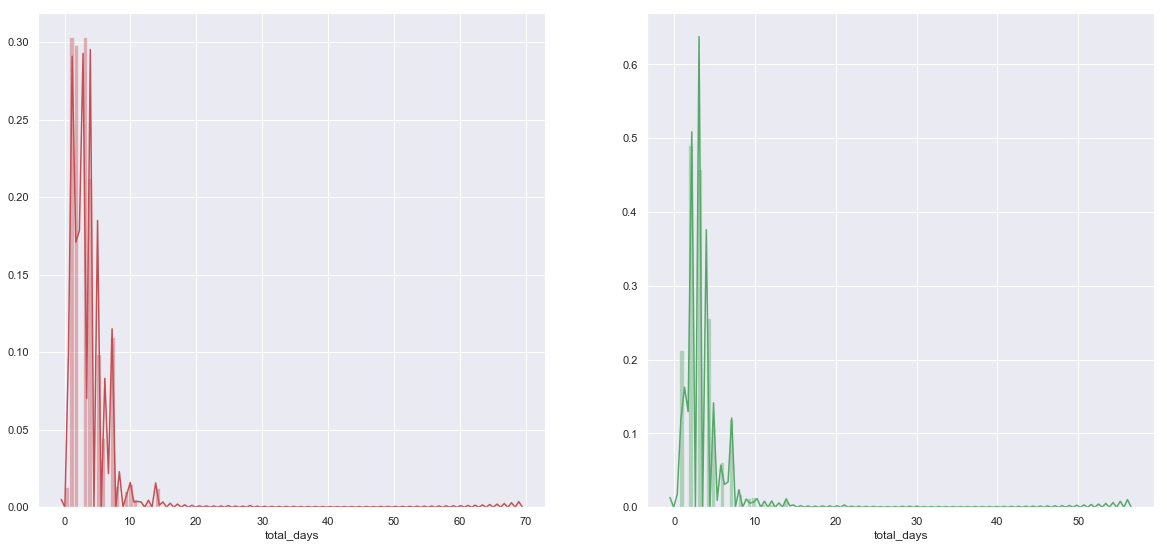

In [62]:
from pylab import *
df_0=df[(df['is_canceled']==0)]
df_1=df[df['is_canceled']==1]
sns.set(rc={"figure.figsize": (20, 20)})
subplot(2,2,1)
ax = sns.distplot(df_0['total_days'], bins=100, color='r')
subplot(2,2,2)
ax=sns.distplot(df_1['total_days'], bins=100, color='g')

Customers who have canaclled had longer stay duration than the rest

In [7]:
#Total customers
df['total_customers'] = df['adults'] + df['children']+df['babies']
df = df.drop('adults',axis=1).drop('children',axis=1).drop('babies',axis=1)

In [8]:
df = df.drop(['reservation_status_date'],axis=1)

In [9]:
len(df['agent'].unique()) # 334 unique values - Large number of unique agents and it is categorical, difficult to encode
df = df.drop('agent',axis=1)

In [10]:
len(df['country'].unique()) # 178 countries
df = df.drop('country',axis=1)

In [11]:
# df['previous_bookings_not_canceled'].value_counts() # We observe that most data has value = 0; hence we drop the feature
# df.groupby(['is_canceled'])['previous_bookings_not_canceled'].value_counts() # We observe that data distribution across both class is remains same
df = df.drop('previous_bookings_not_canceled',axis=1)

In [12]:
# df['previous_cancellations'].value_counts().plot('bar') 
# df.groupby(['is_canceled'])['previous_cancellations'].value_counts()
df = df.drop('previous_cancellations',axis=1)

In [13]:
len(df.columns)

23

In [14]:
backup = df.copy()

In [54]:
#Custom encoding
df['arrival_date_month'] = df['arrival_date_month'].map({'January':1, 'February': 2, 'March':3, \
                                                         'April':4, 'May':5, 'June':6, 'July':7,\
                                                         'August':8, 'September':9, 'October':10, \
                                                         'November':11, 'December':12})

In [55]:
encode = LabelEncoder()

In [154]:
df.columns

Index([u'hotel', u'is_canceled', u'lead_time', u'arrival_date_year',
       u'arrival_date_month', u'arrival_date_week_number',
       u'arrival_date_day_of_month', u'stays_in_weekend_nights',
       u'stays_in_week_nights', u'meal', u'market_segment',
       u'distribution_channel', u'is_repeated_guest', u'reserved_room_type',
       u'assigned_room_type', u'booking_changes', u'deposit_type',
       u'days_in_waiting_list', u'customer_type', u'adr',
       u'required_car_parking_spaces', u'total_of_special_requests',
       u'reservation_status', u'total_customers'],
      dtype='object')

In [56]:
cat_col=['hotel','arrival_date_year','meal','market_segment','distribution_channel','reserved_room_type', 'assigned_room_type',\
        'deposit_type','customer_type','reservation_status']
for i in cat_col:
    df[i] = encode.fit_transform(df[i])

In [18]:
df[cat_col].head()

,hotel,arrival_date_year,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
0,1,0,0,3,1,2,2,0,2,1
1,1,0,0,3,1,2,2,0,2,1
2,1,0,0,3,1,0,2,0,2,1
3,1,0,0,2,0,0,0,0,2,1
4,1,0,0,6,3,0,0,0,2,1


### Feature correlation
<b>Spearman</b> and <b>Pearson</b> are the 2 statistical methods to compute the correlation between features. 
- Pearson is suggested method for features with continuous values and linear relationship
- Spearman is suggested method when features have ordinal categorical data or non-linear relationship
<br>Pandas correlation method by default uses Pearson method, but we can also change it to spearman </br>

In [117]:
df.corr()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,meal,market_segment,distribution_channel,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_days,total_customers
hotel,1.000000,-0.136531,-0.075381,-0.035267,-0.001817,-0.001270,0.001862,-0.008018,-0.083795,-0.174419,...,0.307834,0.072820,-0.159021,-0.072432,-0.047531,-0.096719,0.218873,0.043390,0.247479,0.040821
is_canceled,-0.136531,1.000000,0.293123,0.016660,0.011022,0.008148,-0.006130,-0.017678,0.059338,0.167600,...,-0.176028,-0.144381,0.468634,0.054186,-0.068140,0.047557,-0.195498,-0.234658,0.017779,0.046522
lead_time,-0.075381,0.293123,1.000000,0.040142,0.131424,0.126871,0.002268,0.000349,0.013797,0.220414,...,-0.172219,0.000149,0.375667,0.170084,0.073403,-0.063077,-0.116451,-0.095712,0.157167,0.072265
arrival_date_year,-0.035267,0.016660,0.040142,1.000000,-0.527739,-0.540561,-0.000221,0.065840,0.107697,0.022644,...,0.036141,0.030872,-0.064714,-0.056497,-0.006149,0.197580,-0.013684,0.108531,0.031438,0.052127
arrival_date_month,-0.001817,0.011022,0.131424,-0.527739,1.000000,0.995105,-0.026063,-0.015205,0.001293,0.007381,...,-0.006378,0.004809,0.004048,0.019045,-0.029753,0.079315,0.000257,0.028026,0.021536,0.027252
arrival_date_week_number,-0.001270,0.008148,0.126871,-0.540561,0.995105,1.000000,0.066809,-0.017381,-0.000510,0.005699,...,-0.005684,0.005508,0.003891,0.022933,-0.028432,0.075791,0.001920,0.026149,0.018719,0.025220
arrival_date_day_of_month,0.001862,-0.006130,0.002268,-0.000221,-0.026063,0.066809,1.000000,-0.007086,-0.004088,0.001578,...,0.011646,0.010613,-0.001358,0.022728,0.012188,0.030245,0.008683,0.003062,-0.027408,0.006742
meal,-0.008018,-0.017678,0.000349,0.065840,-0.015205,-0.017381,-0.007086,1.000000,0.145132,0.116957,...,-0.120792,0.024650,-0.092151,-0.007132,0.044658,0.059098,-0.038923,0.023136,0.045277,-0.005975
market_segment,-0.083795,0.059338,0.013797,0.107697,0.001293,-0.000510,-0.004088,0.145132,1.000000,0.767751,...,0.026377,-0.071818,-0.184847,-0.041503,-0.165814,0.232763,-0.062226,0.274373,0.126052,0.213221
distribution_channel,-0.174419,0.167600,0.220414,0.022644,0.007381,0.005699,0.001578,0.116957,0.767751,1.000000,...,-0.104502,-0.113601,0.092580,0.048642,-0.069640,0.092396,-0.132280,0.098815,0.101407,0.144357


In [173]:
feat_corr['deposit_type'].sort_values()

reservation_status            -0.466185
total_of_special_requests     -0.266672
assigned_room_type            -0.242384
reserved_room_type            -0.199689
market_segment                -0.184847
booking_changes               -0.112153
total_days                    -0.100809
meal                          -0.092151
required_car_parking_spaces   -0.090929
adr                           -0.089838
total_customers               -0.079277
customer_type                 -0.076404
arrival_date_year             -0.064714
is_repeated_guest             -0.057502
arrival_date_day_of_month     -0.001358
arrival_date_week_number       0.003891
arrival_date_month             0.004048
distribution_channel           0.092580
days_in_waiting_list           0.121017
lead_time                      0.375667
is_canceled                    0.468634
deposit_type                   1.000000
Name: deposit_type, dtype: float64

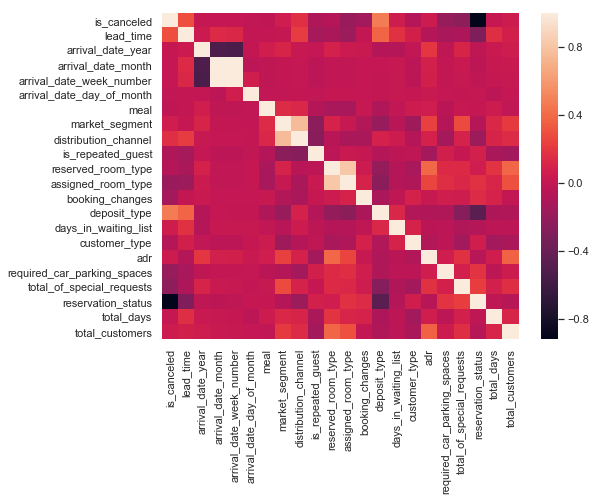

In [105]:
plt.figure(figsize=(8,6))
feat_corr = df.corr()
sns.heatmap(feat_corr)

The diagonal shows correlation of each feature with itself, hence indicates highest correlation.
Using the table and plot we observe that few features have veryhigh correlation
Ex:- 
1. Arrival_date_year and arrival_date_month = -0.52
2. Reservation_status and deposit type = -0.46 
3. market_segment vs distribution_channel = 0.76
4. reserved_room_type vs assigned_room_type = 0.81

In [107]:
feat_corr['is_canceled'].sort_values()

reservation_status            -0.917196
total_of_special_requests     -0.234658
required_car_parking_spaces   -0.195498
assigned_room_type            -0.176028
booking_changes               -0.144381
is_repeated_guest             -0.084793
customer_type                 -0.068140
reserved_room_type            -0.061282
meal                          -0.017678
arrival_date_day_of_month     -0.006130
arrival_date_week_number       0.008148
arrival_date_month             0.011022
arrival_date_year              0.016660
total_days                     0.017779
total_customers                0.046506
adr                            0.047557
days_in_waiting_list           0.054186
market_segment                 0.059338
distribution_channel           0.167600
lead_time                      0.293123
deposit_type                   0.468634
is_canceled                    1.000000
Name: is_canceled, dtype: float64

The reservation_status has high correlation with is_canceled. In Naive Bayes session, we saw that removing the reservation_status feature caused the model performance to drop considerably. Lets see how it affects Trees

## Implementing Descion Tree

There are various decision tree algorithms like - ID3, C4.5, C5.0 and CART. Scikit learn implements optimized version of CART alogrithm. We have multiple hyperparameters in decision tree, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html">sklearn documentation</a> 
<br> <br>
We will try to see the effect of following hyperparameters on modelling -
1. criterion -{gini and entropy}
2. max_depth
3. class_weight

### Model 1 -
Default hyperparaments -- Gini criterion, no class weight and no pruning

In [57]:
df=df.fillna(0)

In [58]:
# Split data into train test set in train:test=70:30 size
y = df["is_canceled"]
X = df.drop(["is_canceled"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [21]:
clf = DecisionTreeClassifier(random_state = 0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [22]:
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)

In [23]:
y_pred[:10]

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

## Evaluation metric

In [25]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
print("recall score: ", recall_score(y_test,y_pred))
print("precision score: ", precision_score(y_test,y_pred))
print("f1 score: ", f1_score(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test,y_pred))

('test-set confusion matrix:\n', array([[22478,     0],
       [    0, 13339]], dtype=int64))
('recall score: ', 1.0)
('precision score: ', 1.0)
('f1 score: ', 1.0)
('accuracy score: ', 1.0)


Feature Importance

In [59]:
d = pd.DataFrame(
    {'Features': list(X_train.columns),
     'Importance': clf.feature_importances_
    })
d.sort_values(by=['Importance'],ascending=False)

,Features,Importance
19,reservation_status,1.0
0,hotel,0.0
1,lead_time,0.0
20,total_days,0.0
18,total_of_special_requests,0.0
17,required_car_parking_spaces,0.0
16,adr,0.0
15,customer_type,0.0
14,days_in_waiting_list,0.0
13,deposit_type,0.0


The model performance is perfect but only 1 feature has been used in the model, hence we should remove that feature to avoid data leak

### Model 2 - 
Remove the feature that is highly correlated with target feature
<br>
<b>Reservation_status</b> has high correlation with is_canceled. Looking at the values in column reveals that canceled is a reservation type. This might be causing data leak. Hence we will delete this feature and train with default hyperparameters

In [35]:
backup['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [ ]:
df = df.drop('reservation_status',axis=1)

In [37]:
# Split data into train test set in train:test=70:30 size
y = df["is_canceled"]
X = df.drop(["is_canceled"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [38]:
clf2 = DecisionTreeClassifier(random_state = 0)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [39]:
y_pred2 = clf2.predict(X_test)
y_prob2 = clf2.predict_proba(X_test)

In [40]:
print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred2)) 
print("recall score: ", recall_score(y_test,y_pred2))
print("precision score: ", precision_score(y_test,y_pred2))
print("f1 score: ", f1_score(y_test,y_pred2))
print("accuracy score: ", accuracy_score(y_test,y_pred2))

('test-set confusion matrix:\n', array([[19231,  3247],
       [ 3133, 10206]], dtype=int64))
('recall score: ', 0.765124821950671)
('precision score: ', 0.7586411952724299)
('f1 score: ', 0.7618692146909525)
('accuracy score: ', 0.8218722952787783)


In [42]:
d = pd.DataFrame(
    {'Features': list(X_train.columns),
     'Importance': clf2.feature_importances_
    })
d.sort_values(by=['Importance'],ascending=False)

,Features,Importance
13,deposit_type,0.237134
1,lead_time,0.168706
16,adr,0.118033
5,arrival_date_day_of_month,0.081162
4,arrival_date_week_number,0.059990
18,total_of_special_requests,0.058941
19,total_days,0.053855
7,market_segment,0.038042
11,assigned_room_type,0.025025
12,booking_changes,0.020870


### Model 3
Let us remove 1 feature from the correlated feature pair, We will remove the feature with lesser importance
1. Arrival_date_year and arrival_date_month = -0.52
2. Reservation_status and deposit type = -0.46 
3. market_segment vs distribution_channel = 0.76
4. reserved_room_type vs assigned_room_type = 0.81


In [123]:
df1=df.copy()
df = df.drop('arrival_date_month',axis=1)
df = df.drop('distribution_channel',axis=1)
df = df.drop('reserved_room_type',axis=1)

In [124]:
# Split data into train test set in train:test=70:30 size
y = df["is_canceled"]
X = df.drop(["is_canceled"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
clf3 = DecisionTreeClassifier(random_state = 0)
clf3.fit(X_train, y_train)
y_pred3=clf3.predict(X_test)
print("f1 score: ", f1_score(y_test,y_pred3))

('f1 score: ', 0.7596021309093618)


In [122]:
d = pd.DataFrame(
    {'Features': list(X_train.columns),
     'Importance': clf3.feature_importances_
    })
d.sort_values(by=['Importance'],ascending=False)

,Features,Importance
10,deposit_type,0.237271
1,lead_time,0.171351
13,adr,0.141337
4,arrival_date_day_of_month,0.086784
3,arrival_date_week_number,0.079913
16,total_days,0.058841
8,assigned_room_type,0.033324
15,total_of_special_requests,0.030256
12,customer_type,0.029286
9,booking_changes,0.026047


### Model 4 - 
Use entropy criterion <br><br>
$Gini = 1- \sum_{n=1}^{c} (P_i)^{2}$ <br><br>
$Entropy = \sum_{n=1}^{c}-P_i*log_2(P_i)$
<img src="img/Impurity criterion.png" style="width: 500px;">
We see that both criterion follow same curve indicating that there is no significant difference between the two.

In [131]:
# Split data into train test set in train:test=70:30 size
df=df1.copy()
y = df["is_canceled"]
X = df.drop(["is_canceled"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
clf4 = DecisionTreeClassifier(criterion="entropy",random_state = 0)
clf4.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [132]:
y_pred4 = clf4.predict(X_test)
y_prob4 = clf4.predict_proba(X_test)
print("f1 score: ", f1_score(y_test,y_pred4))

('f1 score: ', 0.7611090295991008)


Impurity criterion did not affect our model performance. The feature importance of the 2 models also look similar 

In [76]:
d = pd.DataFrame(
    {'Features': list(X_train.columns),
     'Clf2_Importance': clf2.feature_importances_,
     'Clf3_Importance': clf3.feature_importances_
    })
d.sort_values(by=['Clf3_Importance'],ascending=False)

,Clf2_Importance,Clf3_Importance,Features
13,0.237134,0.203415,deposit_type
1,0.168706,0.176323,lead_time
16,0.118033,0.127984,adr
5,0.081162,0.089640,arrival_date_day_of_month
4,0.059990,0.063001,arrival_date_week_number
19,0.053855,0.055489,total_days
18,0.058941,0.047579,total_of_special_requests
7,0.038042,0.035656,market_segment
17,0.019395,0.033527,required_car_parking_spaces
11,0.025025,0.025294,assigned_room_type


<b>Training metric</b>

In [133]:
y_pred4_train = clf4.predict(X_train)
print('test-set confusion matrix:\n', confusion_matrix(y_train,y_pred4_train)) 
print("f1 score: ", f1_score(y_train,y_pred4_train))
print("accuracy score: ", accuracy_score(y_train,y_pred4_train))

('test-set confusion matrix:\n', array([[52528,   160],
       [  514, 30371]], dtype=int64))
('f1 score: ', 0.9890256610655205)
('accuracy score: ', 0.9919351943809603)


We see that the model has very low training error but considerably high test error. This indicates that the model is overfitted. 

### Model 4 -
Pruning the model to avoid overfitting <br>
We have multiple hyperparameters such as max_depth, min_sample_split etc which can be tuned to prune the model. 

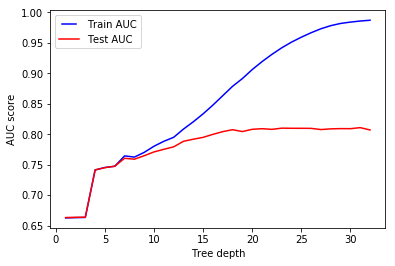

In [83]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   clf4 = DecisionTreeClassifier(max_depth=max_depth)
   clf4.fit(X_train, y_train)
   train_pred = clf4.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)

   train_results.append(roc_auc)
   y_pred = clf4.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)

   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

As the tree depth increases, our training error reduces and we get a perfect AUC score of 1, however the widening gap between the test and training error curve indicates that the model is unable to generalize well on unseen data i.e. the model has overfitted

In [89]:
y = df["is_canceled"]
X = df.drop(["is_canceled"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
clf4 = DecisionTreeClassifier(criterion="gini",random_state = 0,max_depth=15)
clf4.fit(X_train, y_train)
y_pred4 = clf4.predict(X_test)
y_pred4_train = clf4.predict(X_train)
print("Train data f1 score: ", f1_score(y_train,y_pred4_train))
print("Test data f1 score: ", f1_score(y_test,y_pred4))

('Train data f1 score: ', 0.7940868472493717)
('Test data f1 score: ', 0.7422755361686659)


### Model 5
Experiment with class weight. Our data is slightly imbalanced, so try to assign higher weight for positive samples versus negative samples using <b>class_weight</b> hyeperparameter. We can assign {class:weight} or “balanced”<br>

The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))
</br>

In [95]:
y = df["is_canceled"]
X = df.drop(["is_canceled"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
clf5 = DecisionTreeClassifier(criterion="gini",random_state = 0,max_depth=15,class_weight="balanced")
clf5.fit(X_train, y_train)
y_pred5 = clf5.predict(X_test)
y_pred5_train = clf5.predict(X_train)
print("Train data f1 score: ", f1_score(y_train,y_pred5_train))
print("Test data f1 score: ", f1_score(y_test,y_pred5))

('Train data f1 score: ', 0.7973304450320154)
('Test data f1 score: ', 0.7519196692262256)


By adjusting the class_weight, our test f1 score has improved by 1%

Decision tree has many hyperparameters and we can use sklearn's <b>GridSearchCV</b> or <b>RandomizedSearchCV</b> to find the best hyperparaters. <a href="https://scikit-learn.org/stable/modules/grid_search.html">Sklearn documentation</a>

## Ensemble model - Random forest
Random forest is a ensemble of decision trees which aims to improve prediction accuracy while avoiding over fitting. In sklearn's Random forest implementation, each subsample used to fit each tree is same size as actual data but sampled using replacement if <b>bootstrap </b> hyperparameter is set to True. It has many hyperparameters similar to decision tree. <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html">sklearn documenatation </a>

In [103]:
y = df["is_canceled"]
X = df.drop(["is_canceled"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
rf1=RandomForestClassifier()
rf1.fit(X_train,y_train)
y_pred_rf1=rf1.predict(X_test)
y_pred_rf1_train=rf1.predict(X_train)

print("Train data f1 score: ", f1_score(y_train,y_pred_rf1_train))
print("Test data f1 score: ", f1_score(y_test,y_pred_rf1))

('Train data f1 score: ', 0.9745915918877166)
('Test data f1 score: ', 0.7894843439867136)


In [104]:
rf1.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

With default setting, we see that the model has better performance on test data but the training data f1 score is very high, signifying a overfitting. 

### Model 2
1. Using optimal max_depth 
2. Class_weight = "balanced_subsample" - Same as balanced but the ratio is computed for each tree based on the bootstrapped data considered

In [106]:
y = df["is_canceled"]
X = df.drop(["is_canceled"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
rf2=RandomForestClassifier(max_depth=15,class_weight="balanced_subsample")
rf2.fit(X_train,y_train)
y_pred_rf2=rf2.predict(X_test)
y_pred_rf2_train=rf2.predict(X_train)

print("Train data f1 score: ", f1_score(y_train,y_pred_rf2_train))
print("Test data f1 score: ", f1_score(y_test,y_pred_rf2))

('Train data f1 score: ', 0.8196379611666051)
('Test data f1 score: ', 0.7792070617526123)


### Model 3
1. Increase number of estimators to 50; It increases the training time 

In [108]:
y = df["is_canceled"]
X = df.drop(["is_canceled"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
rf3=RandomForestClassifier(max_depth=15,class_weight="balanced_subsample",n_estimators=50)
rf3.fit(X_train,y_train)
y_pred_rf3=rf3.predict(X_test)
y_pred_rf3_train=rf3.predict(X_train)

print("Train data f1 score: ", f1_score(y_train,y_pred_rf3_train))
print("Test data f1 score: ", f1_score(y_test,y_pred_rf3))

('Train data f1 score: ', 0.8312147350671248)
('Test data f1 score: ', 0.786883991429446)


## ROC curve
We will compare the best versions of the 3 classifiers we have trained so far in classification session -
1. Gaussian Naive Bayes
2. Decision tree model 
3. Random forest

In [114]:
classifier3 = GaussianNB()
classifier3.fit(X_train, y_train)
y_probNB = classifier3.predict_proba(X_test)
false_positive_rateNB, true_positive_rateNB, thresholdNB = roc_curve(y_test, y_probNB[:,1])
roc_aucNB = auc(false_positive_rateNB, true_positive_rateNB)

In [110]:
y_prob5 = clf5.predict_proba(X_test)
false_positive_rateDT, true_positive_rateDT, thresholdDT = roc_curve(y_test, y_prob5[:,1])
roc_aucDT = auc(false_positive_rateDT, true_positive_rateDT)

In [111]:
y_prob_rf = rf3.predict_proba(X_test)
false_positive_rateRF, true_positive_rateRF, thresholdRF = roc_curve(y_test, y_prob_rf[:,1])
roc_aucRF = auc(false_positive_rateRF, true_positive_rateRF)

Text(0.5,0,'False Positive Rate')

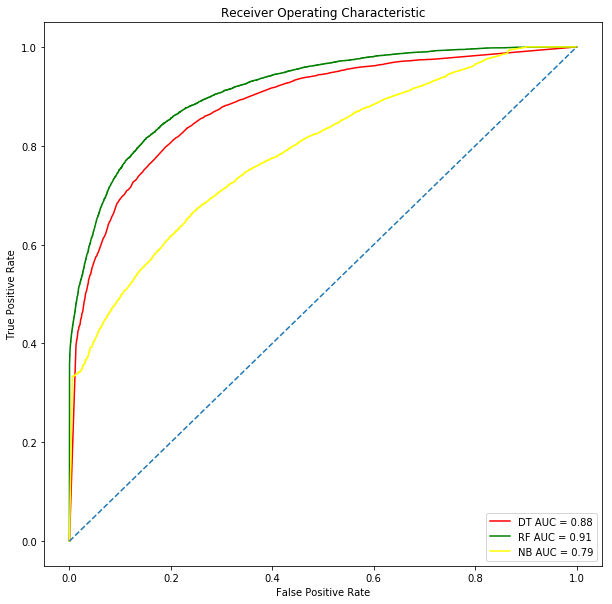

In [115]:
plt.figure(figsize = (10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rateDT, true_positive_rateDT, color = 'red', label = 'DT AUC = %0.2f' % roc_aucDT)
plt.plot(false_positive_rateRF, true_positive_rateRF, color = 'green', label = 'RF AUC = %0.2f' % roc_aucRF)
plt.plot(false_positive_rateNB, true_positive_rateNB, color = 'yellow', label = 'NB AUC = %0.2f' % roc_aucNB)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

We see that Random forest has the best performance among the 3 models